In [1]:
import wave
import numpy as np
import scipy
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display

In [3]:
import os
import re
import random

In [4]:
import keras

Using TensorFlow backend.


In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [7]:
import pickle
import pandas as pd

In [8]:
path_X = "C:/Users/chip/Desktop/TestData/X"
path_O = "C:/Users/chip/Desktop/TestData/O"

In [9]:
dirs_X = os.listdir(path_X)
data_x =dirs_X[1:147]
dirs_O = os.listdir(path_O)
data_o = dirs_O[1:252]

In [10]:
data = {}
data.update({i:[librosa.load(path_O + '/'+i, mono=True,duration = 5.0),np.array([0])] for i in data_o})
data.update({i:[librosa.load(path_X + '/'+i, mono=True,duration = 5.0),np.array([1])] for i in data_x})

In [11]:
keys = []
for key,value in data.items():
    keys.append(key)

In [12]:
np.random.shuffle(keys)

In [13]:
random_data = {}
random_data.update({keys[i]:data[keys[i]] for i in range(len(keys))})

In [14]:
y= []
for key , value in random_data.items():
    y.append(value[1])

In [15]:
add_zero = []
for key , value in random_data.items():
    add_zero.append(110250-len(value[0][0]))

In [16]:
count = 0
for key , value in random_data.items():
    if add_zero[count] != 0:
        random_data.update({key:np.append(value[0][0],np.zeros(add_zero[count]))})
    else:
        random_data.update({key:value[0][0]})
    count += 1

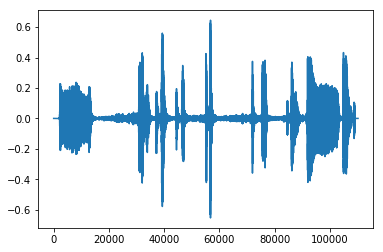

In [17]:
plt.plot(random_data['1704151742.wav'])

In [18]:
extend_X = {}
extend_X.update({i:librosa.feature.mfcc(random_data[i], sr=22050) for i in keys})

In [19]:
data_X = []
for key , value in extend_X.items():
    data_X.append(value)
data_X = np.array(data_X)

In [20]:
np.array([data_X]).shape

(1, 397, 20, 216)

In [21]:
data_X = np.reshape(data_X,(data_X.shape[0],20,216,1))

In [22]:
data_X.shape

(397, 20, 216, 1)

In [102]:
data

{'1506201552.wav': [(array([-0.00188171, -0.00170027, -0.00092705, ..., -0.00069849,
           0.00040079,  0.00047878], dtype=float32), 22050), array([0])],
 '1507111543.wav': [(array([ 0.01592544,  0.30170092,  0.50320053, ..., -0.06968399,
          -0.07527547, -0.04983594], dtype=float32), 22050), array([0])],
 '1512071536.wav': [(array([-1.1170348e-06, -7.4691375e-06, -6.9976795e-06, ...,
          -1.6083736e-02, -1.7456153e-02, -1.1162683e-02], dtype=float32),
   22050),
  array([0])],
 '1601071024.wav': [(array([-0.02079342, -0.04336813, -0.06871148, ...,  0.3267481 ,
           0.22929624,  0.09989812], dtype=float32), 22050), array([0])],
 '1601082141.wav': [(array([ 5.3784422e-08, -2.4885841e-07, -3.0372388e-07, ...,
          -6.8836485e-04, -3.5887986e-04, -1.2244616e-04], dtype=float32),
   22050),
  array([0])],
 '1601082224.wav': [(array([-4.2054100e-07, -8.4507434e-08,  3.7750436e-07, ...,
          -1.7271753e-02, -1.2965783e-02, -6.1388230e-03], dtype=float32),
   

In [23]:
y

[array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),

In [24]:
X_train , X_test , y_train , y_test = train_test_split(data_X, y , test_size=0.3,random_state = 30)

In [25]:
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [103]:
model = Sequential()

In [104]:
model.add(Conv2D(32, kernel_size = (4,4), activation = 'relu',input_shape = (20,216,1)))

In [105]:
model.add(MaxPooling2D(pool_size =(3,3)))

In [106]:
model.add(Dropout(0.2))

In [107]:
model.add(Flatten())

In [108]:
model.add(Dense(64, activation ='relu'))

In [109]:
model.add(Dropout(0.3))

In [110]:
model.add(Dense(128, activation ='relu'))

In [111]:
model.add(Dropout(0.3))

In [112]:
model.add(Dense(2, activation ='softmax'))

In [113]:
model.compile(loss= keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [114]:
finish = model.fit(X_train,y_train_hot,batch_size=10,epochs=200,verbose=1,validation_data=(X_test,y_test_hot))

Train on 277 samples, validate on 120 samples
Epoch 1/200
277/277 [==============================] - 1s 3ms/step - loss: 5.9812 - acc: 0.6029 - val_loss: 5.6413 - val_acc: 0.6500
Epoch 2/200
277/277 [==============================] - 0s 2ms/step - loss: 6.3757 - acc: 0.5993 - val_loss: 10.4768 - val_acc: 0.3500
Epoch 3/200
277/277 [==============================] - 0s 1ms/step - loss: 9.8645 - acc: 0.3827 - val_loss: 10.4768 - val_acc: 0.3500
Epoch 4/200
277/277 [==============================] - 0s 2ms/step - loss: 8.2305 - acc: 0.4765 - val_loss: 5.6413 - val_acc: 0.6500
Epoch 5/200
277/277 [==============================] - 0s 1ms/step - loss: 5.8292 - acc: 0.6282 - val_loss: 3.2986 - val_acc: 0.7583
Epoch 6/200
277/277 [==============================] - 0s 2ms/step - loss: 4.8804 - acc: 0.6751 - val_loss: 1.9213 - val_acc: 0.8667
Epoch 7/200
277/277 [==============================] - 0s 2ms/step - loss: 4.0245 - acc: 0.7401 - val_loss: 2.1275 - val_acc: 0.8583
Epoch 8/200
277/277 [

Epoch 62/200
277/277 [==============================] - 0s 1ms/step - loss: 0.2296 - acc: 0.9819 - val_loss: 1.1152 - val_acc: 0.9083
Epoch 63/200
277/277 [==============================] - 0s 1ms/step - loss: 0.4684 - acc: 0.9495 - val_loss: 1.4261 - val_acc: 0.9000
Epoch 64/200
277/277 [==============================] - 0s 2ms/step - loss: 0.2248 - acc: 0.9747 - val_loss: 0.8906 - val_acc: 0.9167
Epoch 65/200
277/277 [==============================] - 0s 2ms/step - loss: 0.1966 - acc: 0.9639 - val_loss: 1.0896 - val_acc: 0.9250
Epoch 66/200
277/277 [==============================] - 0s 2ms/step - loss: 0.2405 - acc: 0.9783 - val_loss: 0.9843 - val_acc: 0.9083
Epoch 67/200
277/277 [==============================] - 0s 1ms/step - loss: 0.2091 - acc: 0.9711 - val_loss: 1.0982 - val_acc: 0.9167
Epoch 68/200
277/277 [==============================] - 0s 2ms/step - loss: 0.1854 - acc: 0.9819 - val_loss: 0.7482 - val_acc: 0.9333
Epoch 69/200
277/277 [==============================] - 0s 2ms

Epoch 123/200
277/277 [==============================] - 0s 1ms/step - loss: 0.2505 - acc: 0.9783 - val_loss: 1.0340 - val_acc: 0.9333
Epoch 124/200
277/277 [==============================] - 0s 2ms/step - loss: 0.1777 - acc: 0.9856 - val_loss: 1.1925 - val_acc: 0.9167
Epoch 125/200
277/277 [==============================] - 0s 2ms/step - loss: 0.2498 - acc: 0.9819 - val_loss: 1.0585 - val_acc: 0.9250
Epoch 126/200
277/277 [==============================] - 0s 1ms/step - loss: 0.1779 - acc: 0.9856 - val_loss: 1.0585 - val_acc: 0.9250
Epoch 127/200
277/277 [==============================] - 0s 2ms/step - loss: 0.2284 - acc: 0.9675 - val_loss: 0.9396 - val_acc: 0.9333
Epoch 128/200
277/277 [==============================] - 0s 2ms/step - loss: 0.2774 - acc: 0.9783 - val_loss: 1.7364 - val_acc: 0.8917
Epoch 129/200
277/277 [==============================] - 0s 2ms/step - loss: 0.2775 - acc: 0.9783 - val_loss: 0.9402 - val_acc: 0.9417
Epoch 130/200
277/277 [==============================] 

277/277 [==============================] - 0s 1ms/step - loss: 0.1190 - acc: 0.9892 - val_loss: 0.8481 - val_acc: 0.9333
Epoch 184/200
277/277 [==============================] - 0s 2ms/step - loss: 0.0584 - acc: 0.9964 - val_loss: 0.8895 - val_acc: 0.9333
Epoch 185/200
277/277 [==============================] - 0s 2ms/step - loss: 0.0615 - acc: 0.9928 - val_loss: 0.8905 - val_acc: 0.9333
Epoch 186/200
277/277 [==============================] - 0s 2ms/step - loss: 0.0582 - acc: 0.9964 - val_loss: 0.8906 - val_acc: 0.9333
Epoch 187/200
277/277 [==============================] - 0s 2ms/step - loss: 0.1251 - acc: 0.9819 - val_loss: 1.0847 - val_acc: 0.9250
Epoch 188/200
277/277 [==============================] - 0s 2ms/step - loss: 0.1166 - acc: 0.9928 - val_loss: 0.9133 - val_acc: 0.9333
Epoch 189/200
277/277 [==============================] - 0s 1ms/step - loss: 0.0822 - acc: 0.9928 - val_loss: 0.9187 - val_acc: 0.9333
Epoch 190/200
277/277 [==============================] - 0s 1ms/step 

In [115]:
loss = finish.history["loss"]

In [116]:
acc = finish.history["acc"]  

In [117]:
val_loss = finish.history["val_loss"]  

In [118]:
val_acc = finish.history["val_acc"] 

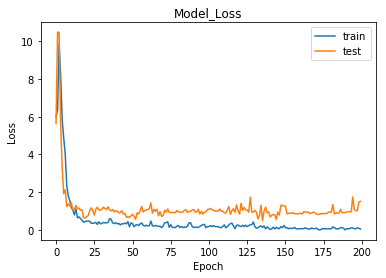

In [119]:
plt.title('Model_Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(loss, label='train')
plt.plot(val_loss, label='test')
plt.legend()
plt.savefig('4C3P_Loss.png')

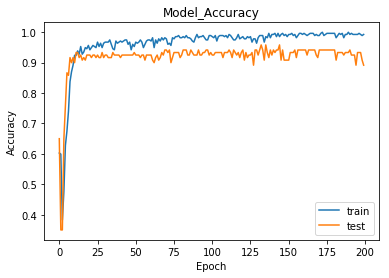

In [120]:
plt.title('Model_Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(acc, label='train')
plt.plot(val_acc, label='test')
plt.legend()
plt.savefig('4C3P_acc.png')